In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df=df.iloc[:,1:2].values

In [5]:
df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() 

C:\Users\abhin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df = sc.fit_transform(df)

In [8]:
df

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
X_train = df[0:1257]
y_train = df[1:1258]

In [10]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [12]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))

C:\Users\abhin\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2238
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0280
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8363
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7263
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5857
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4854
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4199
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3504
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2860
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2515
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2113
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1785
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1544
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1379
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1237
Epoc

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342
Epoch 83/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290
Epoch 84/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297
Epoch 85/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285
Epoch 86/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256
Epoch 87/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 88/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227
Epoch 89/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215
Epoch 90/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 91/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183
Epoch 92/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164
Epoch 93/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153
Epoch 94/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 95/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117
Epoch 96/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108
Epoch 97

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2270e-04
Epoch 161/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8253e-04
Epoch 162/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7982e-04
Epoch 163/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2072e-04
Epoch 164/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5558e-04
Epoch 165/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7634e-04
Epoch 166/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8535e-04
Epoch 167/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4439e-04
Epoch 168/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7946e-04
Epoch 169/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0586e-04
Epoch 170/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7046e-04
Epoch 171/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0102e-04
Epoch 172/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8832e-04
Epoch 173/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6677e-04
Epoch 

In [15]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_set.iloc[:,1:2].values

In [16]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


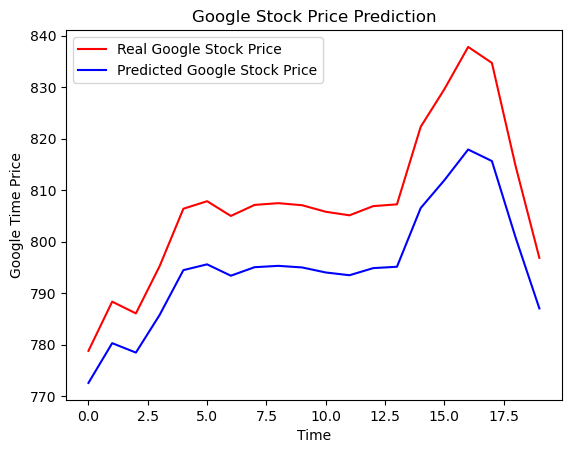

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [18]:
real_stock_price = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price = real_stock_price.iloc[:,1:2].values

In [19]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


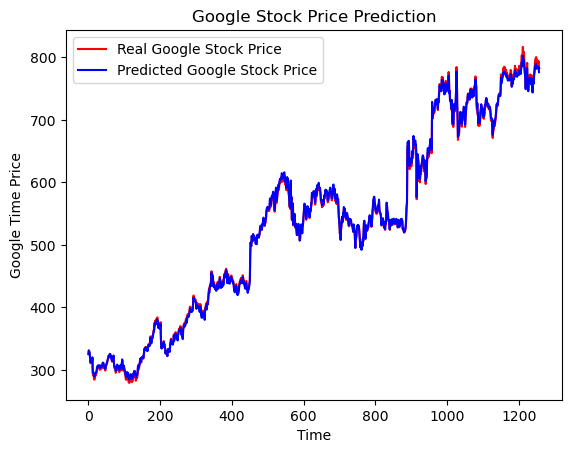

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()